# DSCI100 Group 8 Project Report - Forest Fires

### Introduction

In the face of increasing concerns over climate change, regions like British Columbia are experiencing the direct and immediate consequences of these environmental shifts. One of the most pressing issues is the escalating frequency and intensity of forest fires. Forest Fire Weather Index (FWI) systems play a pivotal role in monitoring and predicting these fires, with local environmental conditions playing a critical role. 

These FWI systems are used worldwide, and are used by many researchers to help predict fire weather patterns. Being able to predict fire weather patterns is crucial for controlling wildfires, not only for ensuring human survivability. For instance, Varela et al. emphasized their research towards predicting fire weather patterns for protecting archaeological and touristic areas in Greece, especially since tourism plays a huge contribution to the Greek economy. Additionally, Rubtsov et al. focussed on how being able to prevent fire weather patterns can help ensure that vegetation and forests in Siberia are protected, especially in such an isolated place with a harsh climate, where there is already a lack of forests as a result. Hence, having a strong understanding of these FWI systems enable a variety of people, whether it be researchers, residents, or meteorologists, to take action to protect both natural and artificial environments. This is to ensure the inhabitants of these environments are able to survive and be knowledgeable regarding the likelihood of a fire spreading to a specific area. 

In this project, we designed a linear regression model that predicts the Initial Spread Index (ISI) in Northern Portugal, which ranges from 0.00 to 56.0 in the FWI system, as it describes the rate of fire spread and indicates the difficulty to control the fire - influencing control measures and strategies. This will be based on environmental factors including rain, relative humidity, wind, and fine fuel moisture code (Figure 1). 

Figure 1: Illustration of the Components of the Fire Weather Index Provided by Natural Resources Canada (CITATION) 

<img src='https://cwfis.cfs.nrcan.gc.ca/images/fwi_structure.gif' width='400'>

For our analysis, we will be using the data set: forest_fires, sourced from http://www.dsi.uminho.pt/~pcortez/forestfires and containing quantified meteorological information from forest fires in the northeast region of Portugal. 

### Method

##### Preparation

We began our analysis by loading in packages, setting a seed for reproducibility, and setting the visual options.  Specifically, the packages we loaded were: “repr”, “tidyverse”, “tidymodels”, “dplyr”, and “cowplot”, and we set the seed to 999.  For easier visualization, we also set the plot height and width to 6.

In [1]:
#Loading Packages
install.packages("cowplot")
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(cowplot)

set.seed(999)
options(repr.plot.width = 6, repr.plot.height = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

After loading the packages, we then loaded in the dataset, a “.csv” file.  Due to a recurring connection error when loading directly from the internet, after consulting with various TAs, we agreed that it was acceptable to load the dataset from our GitHub repository.

In [2]:
ff_raw <- read_csv("https://raw.githubusercontent.com/MingTxm/DSCI100_GroupProject/main/forestfires.csv")
head(ff_raw)

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


The data was already in a relatively clean format to be used in our analysis, so the cleaning and wrangling process was simple.  We selected two variables to be used as predictors: temperature (temp) and wind speed (wind), then dropped any N/A values to create our cleaned data set. 

In [3]:
# Cleaning Data
ff <- ff_raw |>
    select(ISI, temp, wind) |>
    drop_na()
head(ff)
nrow(ff)

ISI,temp,wind
<dbl>,<dbl>,<dbl>
5.1,8.2,6.7
6.7,18.0,0.9
6.7,14.6,1.3
9.0,8.3,4.0
9.6,11.4,1.8
14.7,22.2,5.4


[1] 517

##### Preliminary Data Analysis
Our analysis focuses on the relationships between ISI index, temperature, and wind speeds.  Figure 2 and figure 3 show scatterplots to visualize ISI plotted against temperature and wind speeds respectively.  After observing the shape and visual relationships of the data, we determined that linear regression would be an appropriate predictive model.

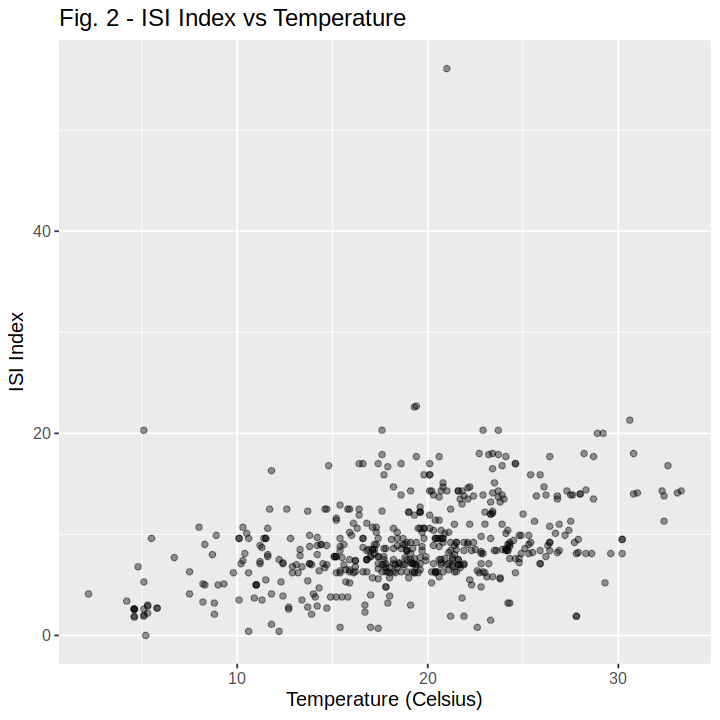

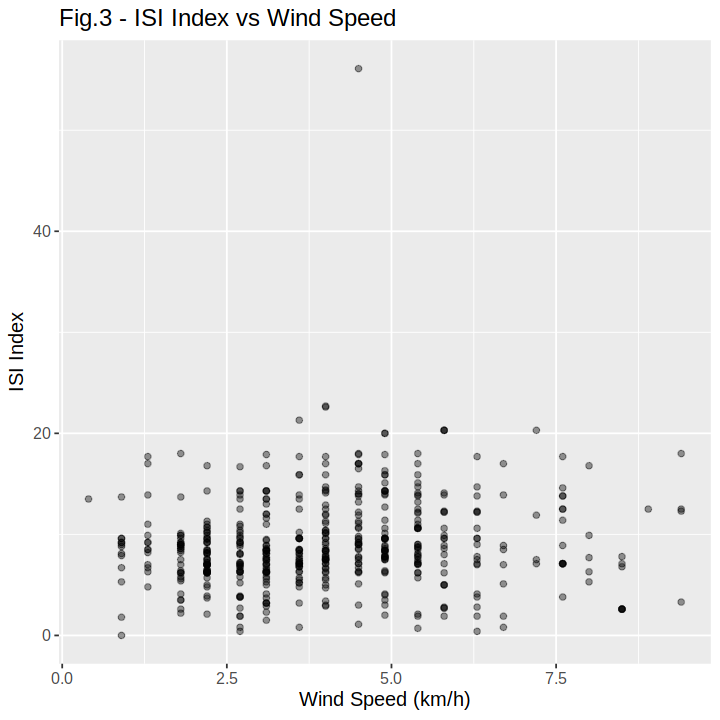

In [4]:
# ISI vs Temperature Plot #
ff_temp_plot <- ff |>
    ggplot(aes(x = temp, y = ISI)) +
        geom_point(alpha = 0.4) +
        labs(x = "Temperature (Celsius)", 
             y = "ISI Index", 
             title = "Fig. 2 - ISI Index vs Temperature"
             ) +
        theme(text = element_text(size = 12))
ff_temp_plot

## ISI vs Wind Plot ##
ff_wind_plot <- ff |>
    ggplot(aes(x = wind, y = ISI)) +
        geom_point(alpha = 0.4) +
        labs(x = "Wind Speed (km/h)", 
             y = "ISI Index", 
             title = "Fig.3 - ISI Index vs Wind Speed"
             ) +
        theme(text = element_text(size = 12))
ff_wind_plot


##### The Predictive Model
For any predictive model, it is common practice to separate the data into datasets for training and testing.  This ensures that the model “learns”, rather than simply mirroring the dataset, and allows us to test the model using the data that was withheld.  To begin, we split the data into training and testing sets using a 75/25 split, straddling the ISI observation for a proportional split.

In [5]:
# Splitting the Data
ff_split <- initial_split(ff, prop = 0.75, strata = ISI)
    ff_train <- training(ff_split)
    ff_test <- testing(ff_split)

To build the predictive linear regression model, we used tools for linear regression contained in the “tidymodels” package.  The first model, “temp_fit” was trained using ISI and temperature, and the second model, “wind_fit” was trained using ISI and wind speed.  The data used to train both models was taken from the training set, "ff_train".  

In [6]:
# Temperature Predictive Model
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

temp_recipe <- recipe(ISI ~ temp, data = ff_train)

temp_fit <- workflow()|>
    add_recipe(temp_recipe) |>
    add_model(lm_spec) |>
    fit(data = ff_train)
temp_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         temp  
     2.7189       0.3274  


In [7]:
# Wind Predictive Model
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

wind_recipe <- recipe(ISI ~ wind, data = ff_train)

wind_fit <- workflow()|>
    add_recipe(wind_recipe) |>
    add_model(lm_spec) |>
    fit(data = ff_train)
wind_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)         wind  
     8.1984       0.2041  


---
We then use each model to predict their respective observations on the test dataset, plotting both together. Figure 4 and figure 5 show the test data as scatterplots, with the linear regression prediction plotted as a blue line.

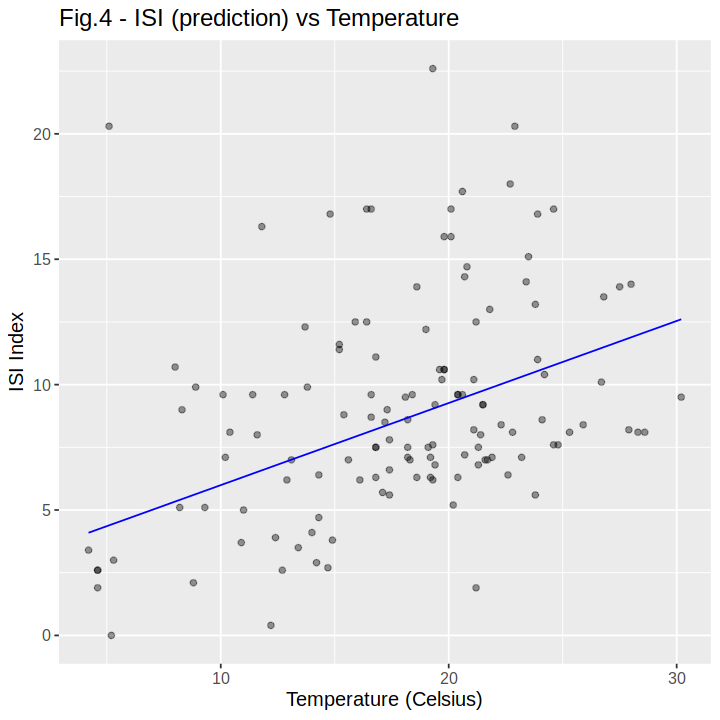

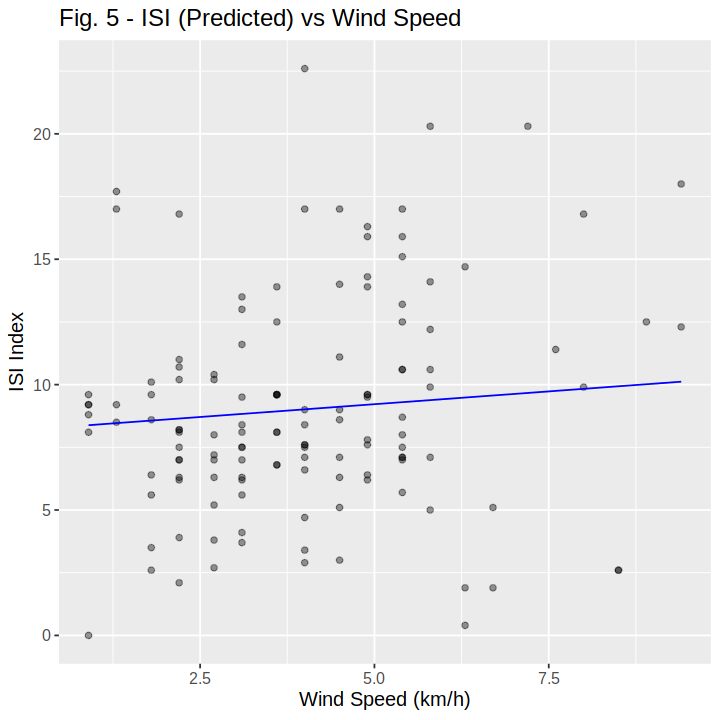

In [8]:
## Temperature Prediction ##
temp_prediction <- temp_fit |>
    predict(ff_test) |>
    bind_cols(ff_test) |>
    select(.pred, ISI, temp)

## Plotting Temperature Prediction ##
temp_prediction_plot <- temp_prediction |>
    ggplot(aes(x = temp, y = ISI)) +
        geom_point(alpha = 0.4) +
        geom_line(mapping = aes(x = temp, y = .pred), color = "blue") +
        labs(x = "Temperature (Celsius)", 
             y = "ISI Index", 
             title = "Fig.4 - ISI (prediction) vs Temperature"
             ) +
        theme(text = element_text(size = 12))
temp_prediction_plot

## Wind Prediction ##
wind_prediction <- wind_fit |>
    predict(ff_test) |>
    bind_cols(ff_test) |>
    select(.pred, ISI, wind)

## Plotting Wind Prediction ##
wind_prediction_plot <- wind_prediction |>
    ggplot(aes(x = wind, y = ISI)) +
        geom_point(alpha = 0.4) +
        geom_line(mapping = aes(x = wind, y = .pred), color = "blue") +
        labs(x = "Wind Speed (km/h)", 
             y = "ISI Index", 
             title = "Fig. 5 - ISI (Predicted) vs Wind Speed"
             ) +
        theme(text = element_text(size = 12))
wind_prediction_plot

For clarity, we plotted the temperature data, figures 2 and 4, along with the wind data, figures 3 and 5, side by side to show the total observation set plotted beside the plotted prediction.

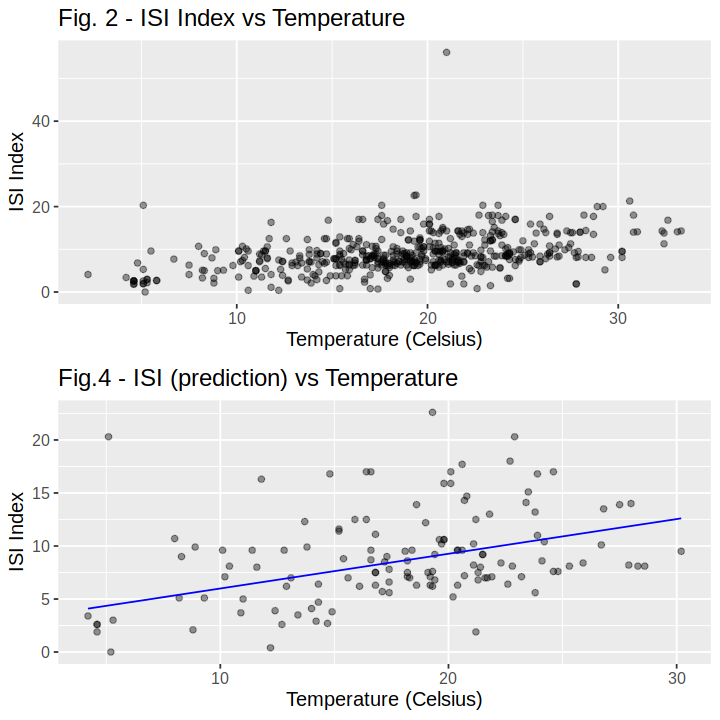

In [9]:
## Temp Plots Side-by-Side ##
temp_plots <- plot_grid(
    ff_temp_plot,
    temp_prediction_plot,
    ncol = 1
    )
temp_plots

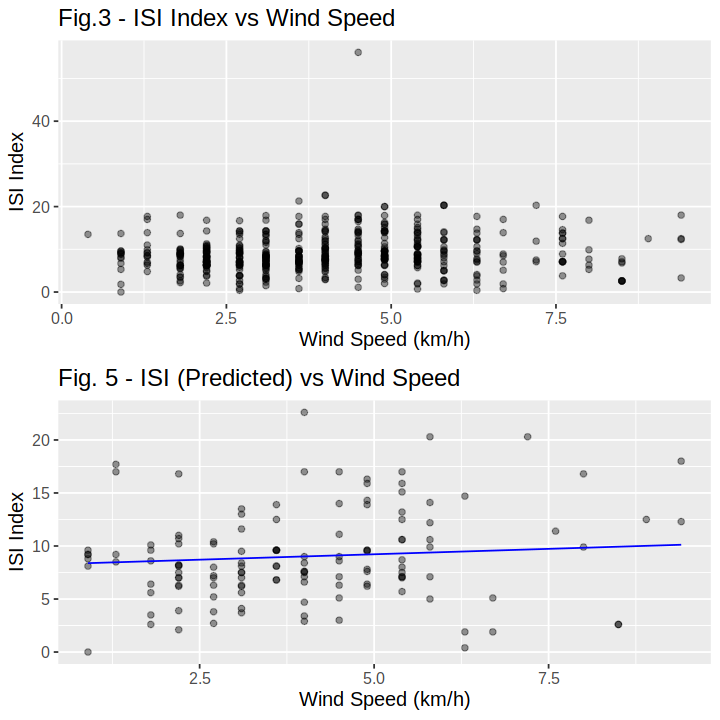

In [10]:
## Wind Plots Side-by-Side ##
wind_plots <- plot_grid(
    ff_wind_plot,
    wind_prediction_plot,
    ncol = 1
    )
wind_plots

##### Evaluation
To evaluate the accuracy of a regression model, we use the Root Mean Squared Prediction Error (RMSPE).  This calculated value quantifies the “accuracy” of the model by calculating the distances between the prediction line and the actual values.  The RMSPE value for our ISI vs Temperature prediction is around 3.3, while the RMSPE for our ISI vs wind speed prediction is around 3.6.  We will use these values to later discuss how  “good” our predictive models are.

In [11]:
## Temp Prediction Accuracy

temp_prediction_results <- temp_fit |>
    predict(ff_test) |>
    bind_cols(ff_test) |>
    metrics(truth = ISI, estimate = .pred)

temp_rmspe <- temp_prediction_results |>
     filter(.metric == "rmse") |>
     select(.estimate) |>
     pull()
temp_rmspe


[1] 4.077402

In [12]:
## Wind Pred Accuracy ##
wind_prediction_results <- wind_fit |>
    predict(ff_test) |>
    bind_cols(ff_test) |>
    metrics(truth = ISI, estimate = .pred)

wind_rmspe <- wind_prediction_results |>
     filter(.metric == "rmse") |>
     select(.estimate) |>
     pull()
wind_rmspe

[1] 4.261309

### Discussion
##### Evaluation
The final linear regression model was able to predict the ISI value of the testing data using temperature (°C) and wind speed (km/h).  The model’s RMPSE value predicting ISI using temperature is 4.0.  Figures 1 & 2 highlight the moderate positive linear relationship between ISI and temperature. While our RMSPE value is not necessarily large considering the range of the ISI, it is greater than 1. Due to this difference, we cannot be fully confident that our prediction is accurate.  Similarly, figures 3 & 4 showcase a moderate positive relationship between ISI and wind speed. The RMSPE value between wind speed and ISI is approximately 4.3, slightly higher than the RMPSE value between temperature and ISI.  Like the first prediction, because the RMPSE is greater than one, we cannot be fully confident that our prediction is accurate.

We must also consider the single outlier in the dataset.  While the ISI generally ranges between 0 and 20, there is a single ISI value that measures at 60.  During the split of the training and testing data, this outlier was shuffled into the training data.  As an outlier with a difference that great, it likely had a strong influence on the training of the model, potentially causing inaccuracy in its prediction.

Overall, our prediction models are able to predict ISI with a moderate level of accuracy, as both variables have an RMPSE value of 4.0 and 4.3 respectively.  However, our predictive models require further tuning, optimization, and a larger pool of training data in order for them to be more reliable and accurate in real-world scenarios.

##### Results
Upon initial observation of the plots of temperature and wind speed observations against ISI (Figure 1 and 3), we expected there to be a strong positive relationship between the prediction variables and the predicted ISI by our linear regression model. Our predictive model reflected this expectation, as an increase in ISI is strongly positively related to temperature and wind speed as demonstrated in Figure 4.  

This finding is to be expected from our understanding of the ISI index. Widely used since __, the ISI index is considered to be a main predictor of the intensity of forest fire outcomes, as it integrates many different weather observations into one number.

Concerning prospective research inquiries, our model provides a tool that can be repurposed, or expanded to include more variables to create a model that has a more holistic comprehension of wildfire dynamics. 

Our group project findings, centering on predicting Ignition Severity Index (ISI) in Northern Portugal forest fires through the incorporation of wind, temperature, and humidity, bear substantial significance for refining wildfire management approaches. This holds direct relevance for regions such as British Columbia (BC). Initiating with the predictive model crafted in this study, it provides a pivotal instrument for forecasting ISI levels contingent on prevailing meteorological conditions. ISI serves as a metric in evaluating the potential repercussions of a fire, encompassing critical factors such as flame length and rate of spread. Through accurate ISI prediction, BC authorities gain the capacity to make judicious decisions regarding the allocation of resources. For instance, if the model signals a heightened ISI due to adverse weather conditions, preemptive measures like controlled burns or evacuation planning can be activated proactively, thus mitigating the risk of uncontrolled wildfires. Beyond immediate fire response, the application of the predictive model embraces a forward-thinking strategy, allowing for the strategic distribution of firefighting resources to zones at elevated risk of severe ignition. This targeted deployment not only heightens the efficacy of firefighting endeavors but also curtails the ecological and economic ramifications of wildfires in the region. 

Researchers could include more observational variables provided by The Canadian Wildland Fire Information System to the model, including but not limited to fuel moisture content, types of vegetation, status of forest growth (new growth vs. old growth), and distance to a body of water. Adding more observations could fine-tune the model's predictive accuracy, and provide an ISI prediction that is more accurate. Adding such variables can improve the model by making more precise predictions that incorporate more environmental factors. This would also allow for our model to be more transferable in predicting ISI for other regions that are forest fire susceptible.Furthermore, future models could look into whether ISI alone is a sufficient predictor, as only using a single value to decide on fire danger makes it easier for meteorologists to decide whether or not to alert people in the area. It could potentially  raise awareness in regions about their risk of forest fires that had not previously recognized their increased vulnerability due to climate change. 

### References
MLA 9